<a href="https://colab.research.google.com/github/AeroEngineerUTK/AE449/blob/main/AirFoil_Lab_Report_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airfoil Lab Report #1
___
1.   Measure the airfoil and import into Python
2.   Pull in data from canvas and import into a dataframe
3.   Plot the above data in Python
4.   Perform calculations and create a coeffcient of lift (y-axis) to angle of attack (x-axis) plot.



## Modeling NACA 2415 Data
## Link: http://airfoiltools.com/airfoil/details?airfoil=n2415-il

In [ ]:
import os

''' Clone github repo to get files '''
#!rm -rf AE449 #This is here to remove the folder if needed
if os.path.exists('AE449') == True:
  print('AE449 Folder exists')
else:
  !git clone https://github.com/Gabriel-Hatcher/AE449.git

Cloning into 'AE449'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
# Upload Local Files to Google Colab
#from google.colab import files
#uploaded = files.upload ()

# Read the Files w/ Pandas
import io
import pandas as pd
import numpy as np
import math
path = '/content/AE449/'

pd.set_option('display.max_rows', 3000)
#NACA2415_Airfoil = pd.read_excel(io.BytesIO(uploaded['NACA2415_Image.xlsx']))
NACA2415_Airfoil = pd.read_excel(path +'NACA2415_Image.xlsx')
#print(NACA2415_Airfoil)

[[0.         0.02438479 0.30480985 0.7803132  1.37774049 2.20682327
  3.03590604 3.84060403 4.60872483]
 [0.         0.08848609 0.28910782 0.42556329 0.4995769  0.50257309
  0.43579152 0.32852626 0.19318702]]
[164.59298466 125.58069257 106.01192179  97.06223061  90.20705813
  85.39484012  82.40730147  80.00732007]
[-159.0953947  -118.67253489  -98.92245028  -91.81809547  -88.20338591
  -86.33780816  -85.23846069  -84.70525677]


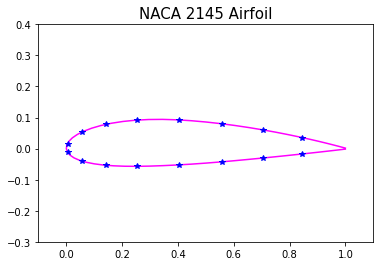

In [ ]:
# Plot the NACA 2415 Data
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(np.asarray(NACA2415_Airfoil.X_Value, dtype=np.float32),np.asarray(NACA2415_Airfoil.Y_Value, dtype=np.float32), color='fuchsia')
plt.ylim(-0.2,0.2)
plt.xlim(-.1,1.1)
plt.yticks(np.arange(-0.3,.5,0.1))
plt.title('NACA 2145 Airfoil', fontsize = 15)

# Pressure Gradient Points
point_1 = 0.004474273
point_2 = 0.055928412
point_3 = 0.143176734
point_4 = 0.252796421
point_5 = 0.4049217
point_6 = 0.55704698
point_7 = 0.704697987
point_8 = 0.845637584
x_list = np.asarray([point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8])

x_airfoil =  np.asarray(NACA2415_Airfoil.X_Value, dtype=np.float32)
first_half_x = x_airfoil[0:int(x_airfoil.size/2)]
second_half_x = x_airfoil[int(x_airfoil.size/2):x_airfoil.size]

y_airfoil =  np.asarray(NACA2415_Airfoil.Y_Value, dtype=np.float32)
first_half_y = y_airfoil[0:int(y_airfoil.size/2)]
second_half_y = y_airfoil[int(y_airfoil.size/2):y_airfoil.size]

''' Temporary '''
#plt.plot(first_half_x,first_half_y)
point_interp_y_top = np.interp(x_list,np.flip(first_half_x),np.flip(first_half_y))
point_interp_y_bot = np.interp(x_list,second_half_x,second_half_y)
plt.plot(x_list,point_interp_y_top,'b*')
plt.plot(x_list,point_interp_y_bot,'b*')




top_points = np.asarray([x_list,point_interp_y_top])
bot_points = np.asarray([x_list,point_interp_y_bot])
#Add origin points to be able to calulate line length
top_points = np.insert(top_points,0,0,axis=1)
bot_points = np.insert(bot_points,0,0,axis=1)



'''Here we calculate the change in the length of the airfoil'''
panels_top = []
panels_bot = []
dy_top = []
dx_top = []
dy_bot = []
dx_bot = []
#Fix the total length of the airfoil
top_points = top_points * 5.45
bot_points = bot_points * 5.45
print(top_points)
for i in range(1,top_points[0].size):
  panels_top.append(np.sqrt(((top_points[0,i]-top_points[0,i-1])**2 + (top_points[1,i]-top_points[1,i-1])**2)))
  panels_bot.append(np.sqrt(((bot_points[0,i]-bot_points[0,i-1])**2 + (bot_points[1,i]-bot_points[1,i-1])**2)))
  dx_top.append(top_points[0,i]-top_points[0,i-1])
  dy_top.append(top_points[1,i]-top_points[1,i-1])
  dx_bot.append(bot_points[0,i]-bot_points[0,i-1])
  dy_bot.append(bot_points[1,i]-bot_points[1,i-1])
panels_top = np.asarray(panels_top)
panels_bot = np.asarray(panels_bot)
dx_top = np.asarray(dx_top)
dy_top = np.asarray(dy_top)
dy_bot = np.asarray(dy_bot)
dx_bot = np.asarray(dx_bot)

#panels_top and panels_bot are the changes in 'area (length) for calculation purpposes
# print(top_points)
# print(bot_points)
# print(panels_top.size)
angle_top = []
angle_bot = []
for i in range(dx_top.size):
  angle_top.append(np.degrees(math.atan2(dy_top[i],dx_top[i]))+90)
  angle_bot.append(np.degrees(math.atan2(dy_bot[i],dx_bot[i]))-90)
angle_top = np.asarray(angle_top)
angle_bot = np.asarray(angle_bot)
print(angle_top)
print(angle_bot)

In [ ]:
'''

========= Need to calculate the pressure gradient for each individual point

'''

'\n\n========= Need to calculate the pressure gradient for each individual point\n\n'

In [ ]:
'''
replacing with chord in coefficeint of lift
lift = P.*A of panel with assume depth of one
========= Need to calculate coefficient of lift and drag, already know angle of attack
========= Need to plot C_L vs angle of attack

'''

'\nreplacing with chord in coefficeint of lift\nlift = P.*A of panel with assume depth of one\n========= Need to calculate coefficient of lift and drag, already know angle of attack\n========= Need to plot C_L vs angle of attack\n\n'

## Adding NACA 2415 Data From Canvas
___

In [ ]:
# Upload Local Files to Google Colab
#from google.colab import files
#uploaded = files.upload ()

# Read the Files w/ Pandas
import io
import pandas as pd
pd.set_option('display.max_rows', 3000)
#df = pd.read_excel(io.BytesIO(uploaded['NACA2415_Data.xlsx']))
df = pd.read_excel(path  +'NACA2415_Data.xlsx')

#sort data frame by AOA upfont
#df = df.sort_values('AOA')
#Reset index after sort
df = df.reset_index(drop=True)

#row number 5 has a bunch of zeros in it for some reason, drop it
df = df.drop(df.index[0])
df = df.reset_index(drop=True)

reverse_data = df[14:21]
reverse_data = reverse_data.reindex(index=reverse_data.index[::-1])
df = df.drop(df.index[14:21])
df = df.append(reverse_data)
df = df.reset_index(drop=True)
df



,RPM %,TUN VEL,TUN PR,AOA,V US1,V US2,V US3,V US4,V US5,V US6,V US7,V US8,V LS1,V LS2,V LS3,V LS4,V LS5,V LS6,V LS7,V LS8,P US1,P US2,P US3,P US4,P US5,P US6,P US7,P US8,P LS1,P LS2,P LS3,P LS4,P LS5,P LS6,P LS7,P LS8,Unnamed: 36,Unnamed: 37
0,30,37.498,-0.321,-5,13.106,25.471,33.405,35.501,37.231,36.219,35.215,34.346,58.660,51.701,48.379,47.494,41.427,39.112,36.909,35.546,-0.039,-0.148,-0.255,-0.288,-0.317,-0.300,-0.283,-0.270,-0.786,-0.611,-0.535,-0.515,-0.392,-0.349,-0.311,-0.289,-0.027,-5.641
1,30,37.163,-0.316,0,19.506,35.319,39.700,39.762,40.055,38.331,37.124,35.438,41.758,41.985,41.456,40.827,38.356,36.877,36.044,34.412,-0.087,-0.285,-0.360,-0.361,-0.367,-0.336,-0.315,-0.287,-0.398,-0.403,-0.393,-0.381,-0.336,-0.311,-0.297,-0.271,-0.012,-7.474
2,30,37.277,-0.317,5,39.962,45.551,46.604,45.051,43.068,41.633,37.949,35.757,23.219,32.327,34.755,35.347,34.853,34.792,33.546,33.098,-0.365,-0.474,-0.496,-0.464,-0.424,-0.396,-0.329,-0.292,-0.123,-0.239,-0.276,-0.285,-0.278,-0.277,-0.257,-0.250,-0.047,-3.995
3,30,36.247,-0.300,10,59.289,54.532,51.335,48.612,48.161,41.042,38.122,35.561,9.663,21.191,27.284,29.850,30.856,31.170,31.330,31.693,-0.803,-0.679,-0.602,-0.540,-0.530,-0.385,-0.332,-0.289,-0.021,-0.103,-0.170,-0.204,-0.218,-0.222,-0.224,-0.229,-0.020,-4.607
4,30,35.764,-0.292,15,70.425,62.506,53.349,48.883,43.780,40.021,37.122,35.587,9.771,13.415,22.503,26.081,27.839,29.388,30.068,31.987,-1.133,-0.893,-0.650,-0.546,-0.438,-0.366,-0.315,-0.289,-0.022,-0.041,-0.116,-0.155,-0.177,-0.197,-0.207,-0.234,-0.054,-3.055
5,30,33.898,-0.263,20,44.857,44.007,42.931,42.265,42.613,42.775,43.206,43.286,9.476,16.357,23.478,27.330,29.179,30.783,32.647,35.431,-0.460,-0.442,-0.421,-0.408,-0.415,-0.418,-0.426,-0.428,-0.021,-0.061,-0.126,-0.171,-0.195,-0.216,-0.243,-0.287,-0.075,-5.218
6,30,31.570,-0.228,25,42.203,41.730,41.636,41.679,41.933,42.022,42.358,42.488,9.567,11.375,19.910,22.749,26.835,28.646,30.659,34.051,-0.407,-0.398,-0.396,-0.397,-0.402,-0.403,-0.410,-0.412,-0.021,-0.030,-0.091,-0.118,-0.165,-0.187,-0.215,-0.265,-0.011,-3.948
7,40,50.937,-0.593,-5,7.883,35.241,46.660,49.155,51.262,49.721,48.350,47.369,80.007,70.940,66.360,61.690,56.586,53.838,50.567,48.050,-0.014,-0.284,-0.497,-0.552,-0.600,-0.565,-0.534,-0.513,-1.462,-1.150,-1.006,-0.869,-0.732,-0.662,-0.584,-0.527,-0.016,-12.363
8,40,51.544,-0.607,0,25.355,48.779,56.093,56.193,55.762,53.203,51.616,49.398,57.937,58.797,57.413,56.004,53.537,51.447,49.333,46.584,-0.147,-0.544,-0.719,-0.721,-0.710,-0.647,-0.609,-0.557,-0.767,-0.790,-0.753,-0.717,-0.655,-0.605,-0.556,-0.496,-0.001,-11.281
9,40,51.745,-0.612,5,55.540,64.063,65.838,63.262,60.117,57.942,52.580,50.039,31.592,45.097,48.338,49.179,48.129,47.909,46.498,45.834,-0.705,-0.938,-0.990,-0.914,-0.826,-0.767,-0.632,-0.572,-0.228,-0.465,-0.534,-0.553,-0.529,-0.524,-0.494,-0.480,-0.031,-5.030


# Testing Some SHIT
___

In [ ]:
# Calculate Free Stream Velocity (U_infty)
#U_infty = np.sqrt(2*())

# Calculate Pressure Coefficient (Cp)
#constants
rho_inf = 0.074887*(1/(12**3)) # lbs/in^3
chord = 1

#split velocity
#split pressure
#get length
#for i .... do the thing

#Vels_U = df[['V US1', 'V US2', 'V US3', 'V US4', 'V US5', 'V US6', 'V US7', 'V US8']]
PRs_U = df[['P US1', 'P US2', 'P US3', 'P US4', 'P US5', 'P US6', 'P US7', 'P US8']]
#Vels_L = df[['V LS1', 'V LS2', 'V LS3', 'V LS4', 'V LS5', 'V LS6', 'V LS7', 'V LS8']]
PRs_L = df[['P LS1', 'P LS2', 'P LS3', 'P LS4', 'P LS5', 'P LS6', 'P LS7', 'P LS8']]
AOAs = df['AOA']
TUN_vels = df['TUN VEL']
TUN_PRs = df['TUN PR']

'''
Mikhail's data
'''
#Cp_1_top = ((df['P US1'])-(df['TUN PR']))/(.5*p_inf*((df['TUN VEL'])**2))
#Cp_1_bot = ((df['P LS1'])-(df['TUN PR'])*np.sin(np.deg2rad(df['AOA'])))/(.5*p_inf*((df['TUN VEL'])**2))
#c_lx = Cp_1_bot - Cp_1_top
#cl = (1/chord)*c_lx

'''
Need to calculate the length of each panel area,
then need to use to find
'''

cl_data = []
lift_top = []
lift_bot = []
lift_tot = []
Cl_list = []
p_convert = -0.0360912 #convert pressure
TUN_V_convert = 12.0 #in in/s^2
for i in range(len(df.index)):

  P_U = np.asarray(PRs_U.iloc[i,:])*p_convert
  P_L = np.asarray(PRs_L.iloc[i,:])*p_convert
  #V_U = np.asarray(Vels_U.iloc[i,:])
  #V_L = np.asarray(Vels_L.iloc[i,:])
  TUN_V = np.asarray(TUN_vels[i])*TUN_V_convert
  TUN_PR = np.asarray(TUN_PRs[i])

  AOA = AOAs[i]
  F_top = P_U*panels_top
  F_bot = P_L*panels_bot
  lift_top.append(F_top*np.sin(np.radians(angle_top + AOA)))
  lift_bot.append(F_bot*np.sin(np.radians(angle_bot + AOA)))
  lift_tot.append(np.sum(np.asarray(lift_top) + np.asarray(lift_bot)))
  Cl = lift_tot[i]/(0.5*rho_inf*(TUN_V)**2)
  Cl_list.append(Cl)


#pressure gradient will be when AOA is 0




#plt.plot(x_list,point_interp_y_top,'b*')

print(Cl_list)

[-0.053657814018951006, -0.054138194678615026, 0.003980314414846461, 0.11610977132634759, 0.24111915519868973, 0.38010611661013166, 0.5708161610671827, 0.16971380763225596, 0.1695039923374907, 0.22918333306620442, 0.34749455964433384, 0.4750951249642429, 0.6417665338721891, 0.8441583805436588, 0.4314808917075925, 0.44662654740888186, 0.5047420204249968, 0.6523014090484266, 0.7671570771751134, 0.9876187834834107, 1.2496830260515661]


In [ ]:
top_points[0]

array([0.        , 0.02438479, 0.30480985, 0.7803132 , 1.37774049,
       2.20682327, 3.03590604, 3.84060403, 4.60872483])

In [ ]:
yo = np.array([5,5,5,5,5,5,5])
yo = np.insert(yo,0,1)
print(yo)

[1 5 5 5 5 5 5 5]


In [ ]:
print(AOAs)
print(AOAs[0])

0     -5
1      0
2      5
3     10
4     15
5     20
6     25
7     -5
8      0
9      5
10    10
11    15
12    20
13    25
14    -5
15     0
16     5
17    10
18    15
19    20
20    25
Name: AOA, dtype: int64
-5
